In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

In [14]:
def get_bootstrap(
    data_column_1, 
    data_column_2,
    boot_it = 1000, 
    statistic = np.mean, 
    bootstrap_conf_level = 0.95 
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): 
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True 
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [2]:
data_ab = pd.read_csv('hw_bootstrap.csv', sep=';', decimal=',')

In [3]:
data_ab.head()

,Unnamed: 0,value,experimentVariant
0,1,9.773113,Treatment
1,2,9.311246,Treatment
2,3,11.172828,Treatment
3,4,11.624510,Treatment
4,5,10.462331,Treatment


In [4]:
data_ab.dtypes

Unnamed: 0             int64
value                float64
experimentVariant     object
dtype: object

In [5]:
data_ab.groupby('experimentVariant').agg({'value': 'count'})

,value
experimentVariant,
Control,500
Treatment,50


In [6]:
data_ab.groupby('experimentVariant').agg({'value': 'mean'})

,value
experimentVariant,
Control,10.026867
Treatment,10.367236


In [7]:
data_ab.groupby('experimentVariant').agg({'value': 'median'})

,value
experimentVariant,
Control,10.018465
Treatment,10.420193


<AxesSubplot:xlabel='experimentVariant', ylabel='value'>

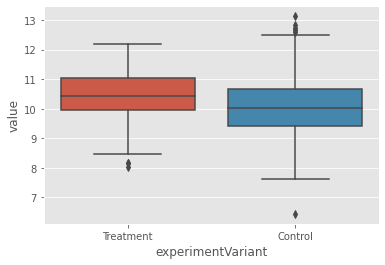

In [8]:
sns.boxplot(x="experimentVariant", y="value", data=data_ab)

C:\Users\eugenegabriel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value'>

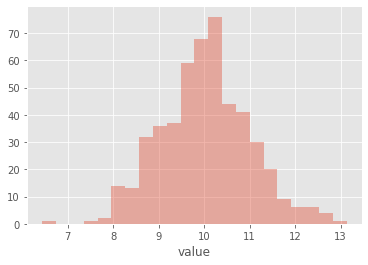

In [9]:
sns.distplot(data_ab[data_ab.experimentVariant == 'Control'].value, kde=False)

<AxesSubplot:xlabel='value'>

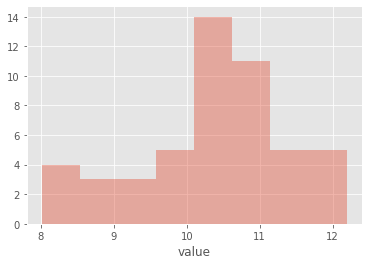

In [10]:
sns.distplot(data_ab[data_ab.experimentVariant == 'Treatment'].value, kde=False)

In [15]:
mannwhitneyu(data_ab[data_ab.experimentVariant == 'Treatment'].value, 
             data_ab[data_ab.experimentVariant == 'Control'].value)

MannwhitneyuResult(statistic=9508.0, pvalue=0.0026182097937983984)

In [16]:
ttest_ind(data_ab[data_ab.experimentVariant == 'Treatment'].value, 
             data_ab[data_ab.experimentVariant == 'Control'].value)

Ttest_indResult(statistic=2.331858965573001, pvalue=0.020069539127355422)

  0%|          | 0/1000 [00:00<?, ?it/s]

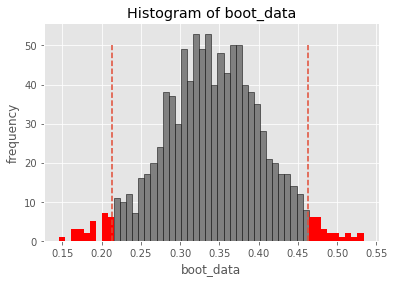

{'boot_data': [0.327449255731154,
  0.3022433446406585,
  0.2893861682148192,
  0.3764874617370374,
  0.3328671499652633,
  0.2593612035842317,
  0.3332924892877135,
  0.2747234817174373,
  0.33453822542460987,
  0.2516322117592155,
  0.43906445688700274,
  0.3967128366422727,
  0.29489454120407244,
  0.3727753012633869,
  0.2586147160829471,
  0.2509106032920363,
  0.3853091005374605,
  0.36468664684167673,
  0.3852996071721715,
  0.35764409020779486,
  0.326831051380058,
  0.3616568094292555,
  0.35032248437086694,
  0.3921046187423367,
  0.34239687021713744,
  0.41275958109947114,
  0.3649384292283004,
  0.3190928268093899,
  0.28997344795013447,
  0.4464054529271715,
  0.39434760221525494,
  0.3041304009999413,
  0.2933213528232407,
  0.36543382731806523,
  0.33129174205770745,
  0.27747237180154716,
  0.2409148553967579,
  0.23469871204125434,
  0.3148472903031077,
  0.3234254696968678,
  0.29595419780238497,
  0.2526587049003245,
  0.3438996893167044,
  0.3424024039462377,
  0.35

In [17]:
get_bootstrap(
    data_ab[data_ab.experimentVariant == 'Treatment'].value, 
    data_ab[data_ab.experimentVariant == 'Control'].value, 
    boot_it = 1000, 
    statistic = np.mean, 
    bootstrap_conf_level = 0.95 
)

  0%|          | 0/1000 [00:00<?, ?it/s]

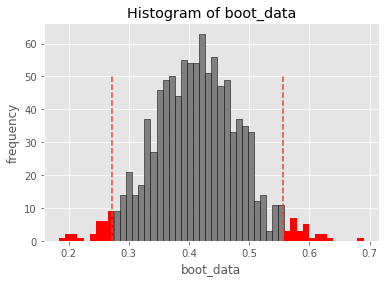

{'boot_data': [0.3413033334908002,
  0.4520818013858703,
  0.5078716066823041,
  0.45646847274104907,
  0.3765562348368743,
  0.4449353726116003,
  0.42999419306069964,
  0.38921637924480024,
  0.41278892471306516,
  0.43872696125798516,
  0.4235848578809449,
  0.3377476282477305,
  0.4322798693120493,
  0.4035648757051007,
  0.3687466765825409,
  0.3691554788609448,
  0.3032952993465994,
  0.4613357682994401,
  0.5390157611872652,
  0.3216314189860494,
  0.3596368852256502,
  0.28851508174640017,
  0.4978032419874401,
  0.4970902865685005,
  0.3961081024599,
  0.37745762224012047,
  0.34941483542706564,
  0.3613367302731998,
  0.28161454031609967,
  0.4177439579792397,
  0.4074162564750514,
  0.5007916914760742,
  0.4462981188580546,
  0.4228988898634194,
  0.25017790279747043,
  0.3570721861363495,
  0.47613391014331086,
  0.32642074332397897,
  0.352275420335606,
  0.3649741053555555,
  0.34364084591479926,
  0.4999273036553644,
  0.4505435754833753,
  0.4648311181382949,
  0.397352

In [19]:
get_bootstrap(
    data_ab[data_ab.experimentVariant == 'Treatment'].value, 
    data_ab[data_ab.experimentVariant == 'Control'].value, 
    boot_it = 1000, 
    statistic = np.median, 
    bootstrap_conf_level = 0.95 
)